In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2006-01-01'
end = '2024-02-28'
stock = 'AAPL'

df = yf.download(stock, start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.260118,807234400
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.266770,619603600
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.248932,449422400
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.306983,704457600
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.299424,675040800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700
2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45119700
2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,2.585000,2.669643,2.580357,2.669643,2.260118,807234400
1,2006-01-04,2.683214,2.713571,2.660714,2.677500,2.266770,619603600
2,2006-01-05,2.672500,2.675000,2.633929,2.656429,2.248932,449422400
3,2006-01-06,2.687500,2.739286,2.662500,2.725000,2.306983,704457600
4,2006-01-09,2.740357,2.757143,2.705000,2.716071,2.299424,675040800


In [ ]:
df= df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,2.585000,2.669643,2.580357,2.669643,2.260118,807234400
1,2.683214,2.713571,2.660714,2.677500,2.266770,619603600
2,2.672500,2.675000,2.633929,2.656429,2.248932,449422400
3,2.687500,2.739286,2.662500,2.725000,2.306983,704457600
4,2.740357,2.757143,2.705000,2.716071,2.299424,675040800


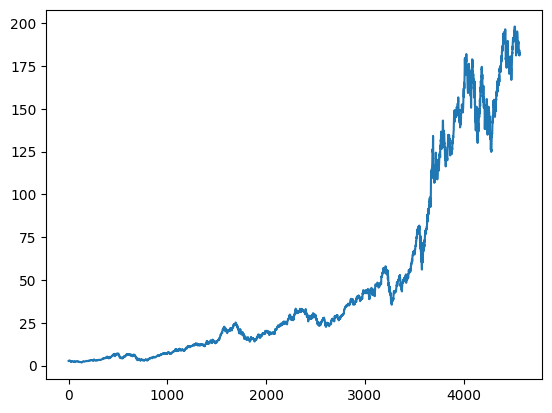

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
0,2.585000,2.669643,2.580357,2.669643,2.260118,807234400
1,2.683214,2.713571,2.660714,2.677500,2.266770,619603600
2,2.672500,2.675000,2.633929,2.656429,2.248932,449422400
3,2.687500,2.739286,2.662500,2.725000,2.306983,704457600
4,2.740357,2.757143,2.705000,2.716071,2.299424,675040800
...,...,...,...,...,...,...
4563,181.940002,182.889999,180.660004,182.320007,182.320007,41529700
4564,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
4565,185.009995,185.039993,182.229996,182.520004,182.520004,45119700
4566,182.240005,182.759995,180.649994,181.160004,181.160004,40867400


In [ ]:
ma100 = df['Adj Close'].rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4563    184.902519
4564    185.043737
4565    185.161268
4566    185.239866
4567    185.346629
Name: Adj Close, Length: 4568, dtype: float64

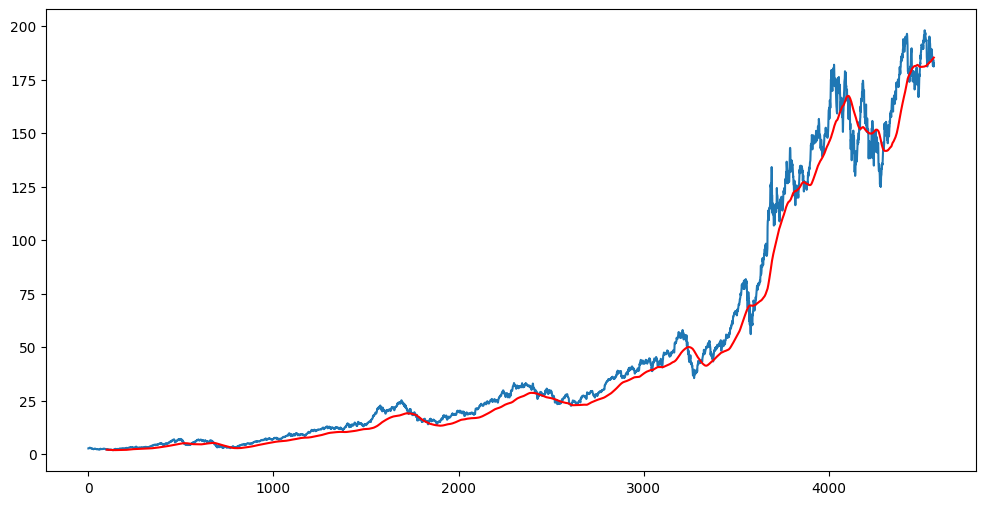

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4563    183.63355
4564    183.68755
4565    183.73265
4566    183.77960
4567    183.82495
Name: Close, Length: 4568, dtype: float64

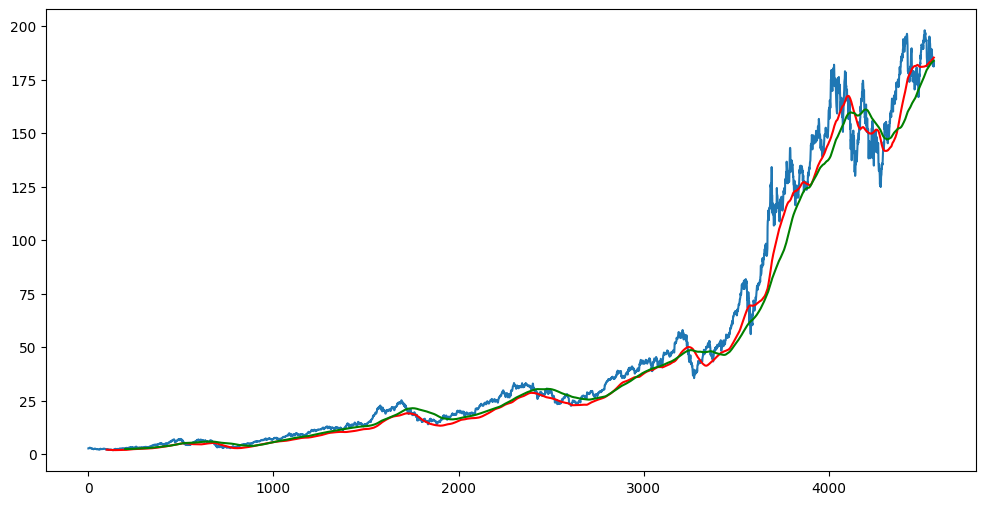

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(4568, 6)

In [ ]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3197, 1)
(1371, 1)


In [ ]:
data_training.head()

,Close
0,2.669643
1,2.677500
2,2.656429
3,2.725000
4,2.716071


In [ ]:
data_testing.head()

,Close
3197,55.959999
3198,54.470001
3199,54.560001
3200,54.592499
3201,55.007500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01555706],
       [0.01569919],
       [0.01531803],
       ...,
       [0.97960399],
       [0.96703172],
       [0.99118133]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(3097, 100, 1)

In [ ]:
#ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
97/97 [==============================] - 34s 287ms/step - loss: 0.0028
Epoch 2/2
97/97 [==============================] - 29s 300ms/step - loss: 0.0025


In [ ]:
model.save('keras_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
3197,55.959999
3198,54.470001
3199,54.560001
3200,54.592499
3201,55.007500


In [ ]:
past_100_days = data_training.tail(100)
past_100_days

,Close
3097,40.735001
3098,40.912498
3099,41.055000
3100,40.580002
3101,41.314999
...,...
3192,55.325001
3193,54.582500
3194,55.962502
3195,55.267502


In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)
data_testing

<ipython-input-33-17a8489f5431>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
3197,55.959999
3198,54.470001
3199,54.560001
3200,54.592499
3201,55.007500
...,...
4563,182.320007
4564,184.369995
4565,182.520004
4566,181.160004


In [ ]:
final_df

,Close
0,40.735001
1,40.912498
2,41.055000
3,40.580002
4,41.314999
...,...
1466,182.320007
1467,184.369995
1468,182.520004
1469,181.160004


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0319108 ],
       [0.03300268],
       [0.03387928],
       ...,
       [0.90409845],
       [0.89573243],
       [0.90477511]])

In [ ]:
input_data.shape

(1471, 1)

In [ ]:
x_test = []
y_test =[]
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1371, 100, 1)
(1371,)


In [ ]:
#Making Predictions

y_predicted = model.predict(x_test)

43/43 [==============================] - 5s 88ms/step


In [ ]:
y_predicted.shape

(1371, 1)

In [ ]:
y_test

array([0.12556708, 0.11640139, 0.11695502, ..., 0.90409845, 0.89573243,
       0.90477511])

In [ ]:
scaler.scale_

array([0.00615148])

In [ ]:
scale_factor = 1/0.00661917
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

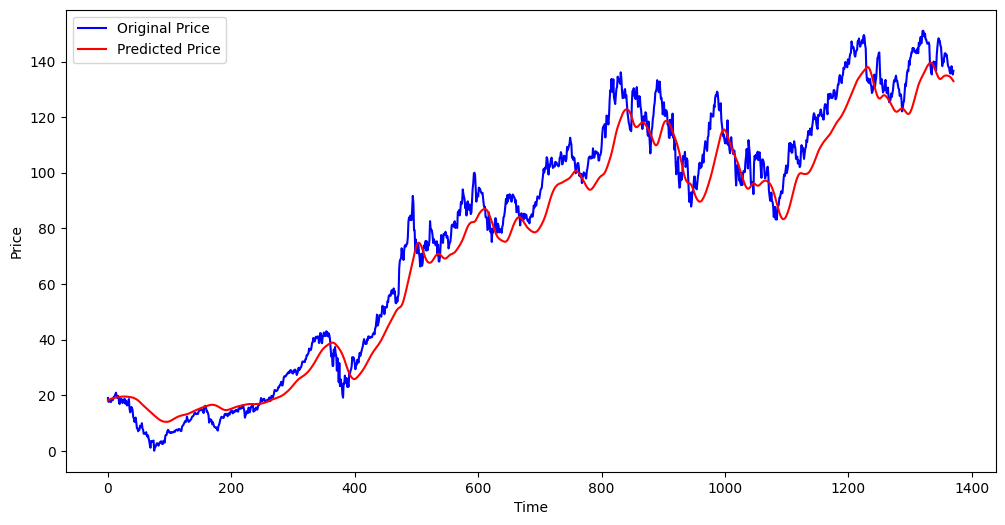

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#future Price

In [ ]:
m = input_data[-100:].reshape(-1, 1)  # Start with the last 100 days of known data
z = []
future_days=5
for i in range(future_days):
    # Predict the next day's price
    pred = model.predict(m.reshape(1, -1, 1))
    z.append(pred[0][0])
    # Update m to include the predicted price for the next iteration
    m = np.append(m, pred)[1:].reshape(-1, 1)

# Inverse transform the predicted prices to their original scale
future_prices = scaler.inverse_transform(np.array(z).reshape(-1, 1))

future_prices


1/1 [==============================] - 0s 57ms/step


array([[178.22258],
       [177.81918],
       [177.39397],
       [176.94243],
       [176.46257]], dtype=float32)

In [ ]:
!pip install datetime
import datetime

1/1 [==============================] - 0s 52ms/step


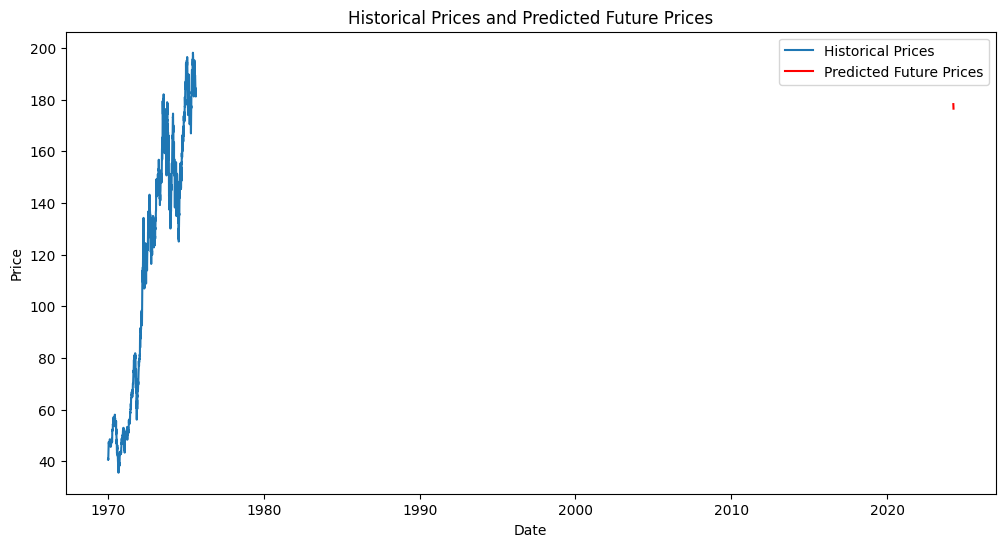

In [ ]:
# Predict future prices for the next 5 days starting from today
future_days = 5

# Get today's date
today = datetime.datetime.now().strftime('%Y-%m-%d')

# Create a date range for the next 5 days
future_dates = pd.date_range(start=today, periods=future_days)

# Initialize the input data with the last 100 days of known data
m = input_data[-100:].reshape(-1, 1)

# List to store predicted prices
z = []

# Iterate for each future day
for i in range(future_days):
    # Predict the next day's price
    pred = model.predict(m.reshape(1, -1, 1))
    z.append(pred[0][0])
    # Update m to include the predicted price for the next iteration
    m = np.append(m, pred)[1:].reshape(-1, 1)

# Inverse transform the predicted prices to their original scale
future_prices = scaler.inverse_transform(np.array(z).reshape(-1, 1))

# Create a DataFrame for the predicted future prices
future_prices_df = pd.DataFrame(data=future_prices, index=future_dates, columns=['Predicted Price'])

# Plotting future prices
plt.figure(figsize=(12, 6))
plt.plot(final_df.index, final_df['Close'], label='Historical Prices')
plt.plot(future_prices_df.index, future_prices_df['Predicted Price'], 'r', label='Predicted Future Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Prices and Predicted Future Prices')
plt.legend()
plt.show()
